0 3 9 12 9 3
(array([495], dtype=int64),)
(array([484], dtype=int64),)
(array([476], dtype=int64),)
(array([482], dtype=int64),)
(array([495], dtype=int64),)
0.32940157875418663
0.30222018528729677
0.31168446503579617
0.2999745514243841
0.30853510927408934


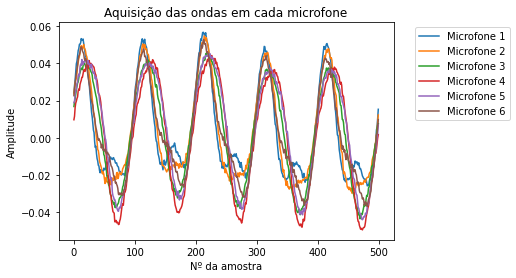

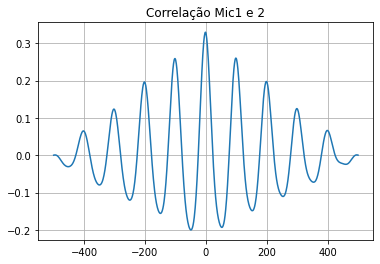

<Figure size 432x288 with 0 Axes>

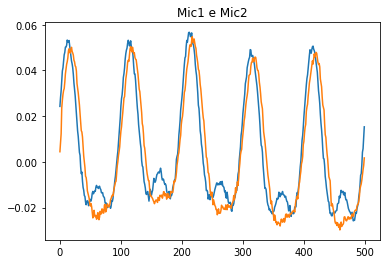

<Figure size 432x288 with 0 Axes>

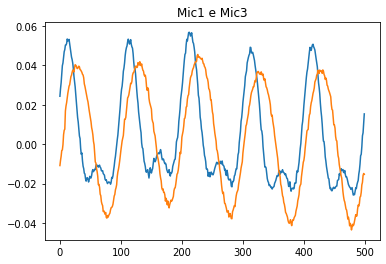

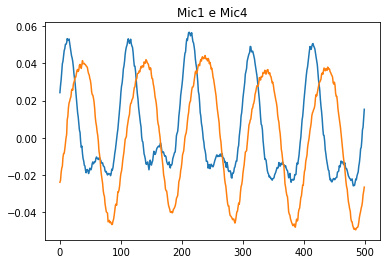

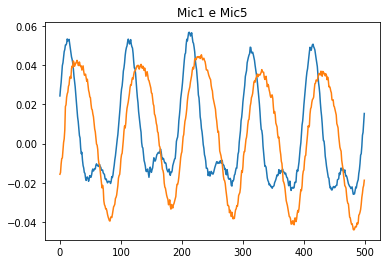

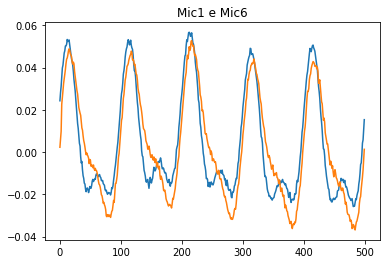

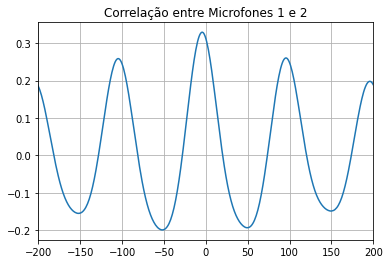

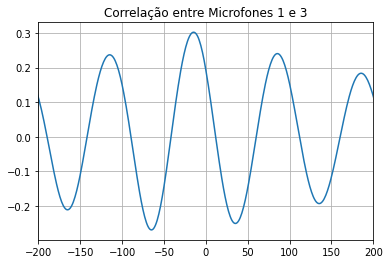

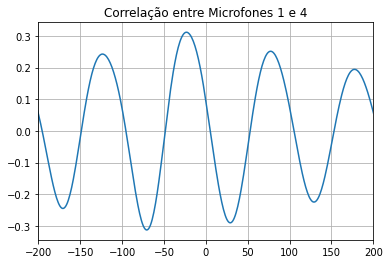

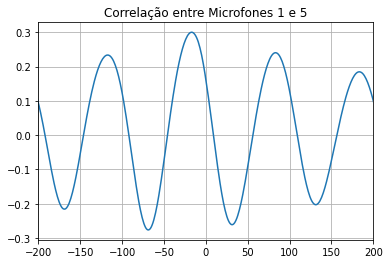

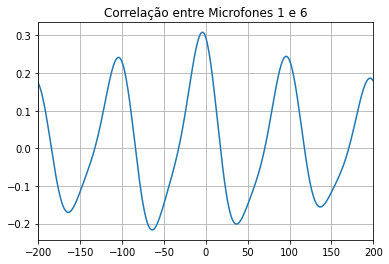

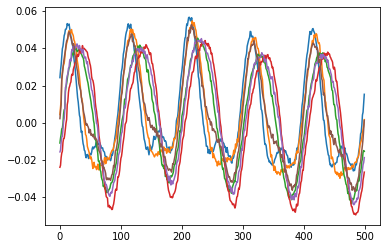

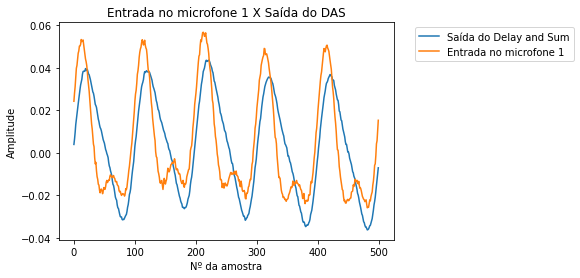

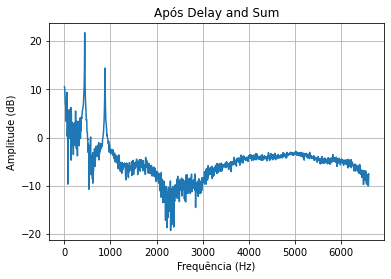

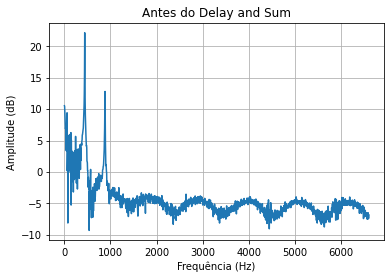

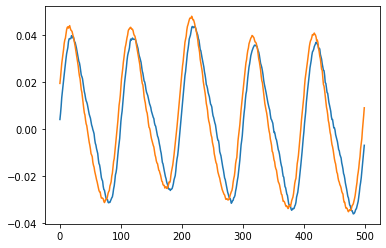

In [1]:
# Delay and sum consolidado

def calcula_delays(dir_chegada):

    #Coordenadas esféricas de cada microfone, considerando diâmetro de 9.2
    mic1_esf= (4.61,2*np.pi/3)
    mic2_esf= (4.61,np.pi/3)
    mic3_esf= (4.61,0)
    mic4_esf= (4.61,-np.pi/3)
    mic5_esf= (4.61,-2*np.pi/3)
    mic6_esf= (4.61,np.pi)

    #Passagem de coordenadas esféricas para coordenadas cartesianas

    mic1_cart = (mic1_esf[0]*np.cos(mic1_esf[1]),mic1_esf[0]*np.sin(mic1_esf[1]))
    mic2_cart = (mic2_esf[0]*np.cos(mic2_esf[1]),mic2_esf[0]*np.sin(mic2_esf[1]))
    mic3_cart = (mic3_esf[0]*np.cos(mic3_esf[1]),mic3_esf[0]*np.sin(mic3_esf[1]))
    mic4_cart = (mic4_esf[0]*np.cos(mic4_esf[1]),mic4_esf[0]*np.sin(mic4_esf[1]))
    mic5_cart = (mic5_esf[0]*np.cos(mic5_esf[1]),mic5_esf[0]*np.sin(mic5_esf[1]))
    mic6_cart = (mic6_esf[0]*np.cos(mic6_esf[1]),mic6_esf[0]*np.sin(mic6_esf[1]))

    #definição do mic de chegada
    if dir_chegada <= np.pi/6 or dir_chegada >= 11*np.pi/6:
        mic_chegada = mic3_cart
        mic_saida = mic6_cart
    elif dir_chegada >= np.pi/6 and dir_chegada <= np.pi/2:
        mic_chegada = mic2_cart
        mic_saida = mic5_cart
    elif dir_chegada >= np.pi/2 and dir_chegada <= 5*np.pi/6:
        mic_chegada = mic1_cart
        mic_saida = mic4_cart
    elif dir_chegada >= 5*np.pi/6 and dir_chegada <= 7*np.pi/6:
        mic_chegada = mic6_cart
        mic_saida = mic3_cart
    elif dir_chegada >=7*np.pi/6 and dir_chegada <= 3*np.pi/2:
        mic_chegada = mic5_cart
        mic_saida = mic2_cart
    elif dir_chegada >= 3*np.pi/2 and dir_chegada <= 11*np.pi/6:
        mic_chegada = mic4_cart
        mic_saida = mic1_cart
        
    #Inclinação da onda plana de chegada
    if (dir_chegada >= 0 and dir_chegada <= np.pi/2):
        inclinacao = np.pi/2 + dir_chegada
    if (dir_chegada >= np.pi/2 and dir_chegada <= np.pi):
        inclinacao = -np.pi/2 + dir_chegada
    if (dir_chegada >= np.pi and dir_chegada <= 3*np.pi/2):
        inclinacao = np.pi/2 + dir_chegada - np.pi
    if  (dir_chegada >= 3*np.pi/2 and dir_chegada <= 4*np.pi/2):
        inclinacao = -np.pi/2 + dir_chegada - np.pi

    #com a inclinação da frente de onda e com o mic de chegada, podemos traçar a reta que determina a frente de onda plana
    a = np.tan(inclinacao)
    b = -1
    c = mic_saida[1] - mic_saida[0]*np.tan(inclinacao)

    #criar casos especiais para chegada de 0 graus e 180 graus 
    #distancias em relação ao microfone de saída em centimetros
    if dir_chegada == 0:
        distancia_1 = 2.305
        distancia_2 = 6.915
        distancia_3 = 9.22
        distancia_4 = 6.915
        distancia_5 = 2.305
        distancia_6 = 0
    elif dir_chegada == np.pi:
        distancia_1 = 6.915
        distancia_2 = 2.305
        distancia_3 = 0
        distancia_4 = 2.305
        distancia_5 = 6.915
        distancia_6 = 9.22
    else:
        distancia_1 = np.abs(a*mic1_cart[0] + b*mic1_cart[1] + c)/(np.sqrt(a**2+b**2))
        distancia_2 = np.abs(a*mic2_cart[0] + b*mic2_cart[1] + c)/(np.sqrt(a**2+b**2))
        distancia_3 = np.abs(a*mic3_cart[0] + b*mic3_cart[1] + c)/(np.sqrt(a**2+b**2))
        distancia_4 = np.abs(a*mic4_cart[0] + b*mic4_cart[1] + c)/(np.sqrt(a**2+b**2))
        distancia_5 = np.abs(a*mic5_cart[0] + b*mic5_cart[1] + c)/(np.sqrt(a**2+b**2))
        distancia_6 = np.abs(a*mic6_cart[0] + b*mic6_cart[1] + c)/(np.sqrt(a**2+b**2))
        
    #cálculo dos atrasos

    v = 34000 #velocidade do som em centímetros por segundo
    fs = 44100 #frequência de amostragem
    Ts = 1/fs

    tempo_1 = distancia_1/v
    tempo_2 = distancia_2/v
    tempo_3 = distancia_3/v
    tempo_4 = distancia_4/v
    tempo_5 = distancia_5/v
    tempo_6 = distancia_6/v

    delay1 = int(round(tempo_1/Ts))
    delay2 = int(round(tempo_2/Ts))
    delay3 = int(round(tempo_3/Ts))
    delay4 = int(round(tempo_4/Ts))
    delay5 = int(round(tempo_5/Ts))
    delay6 = int(round(tempo_6/Ts))

    return delay1, delay2, delay3, delay4, delay5, delay6

import numpy as np
from scipy.io.wavfile import read
import matplotlib.pyplot as plt
import wavio
import warnings
import math
warnings.filterwarnings("ignore")

a = read("mic1.wav")
y1a = np.array(a[1],dtype=float)
plt.plot(y1a[1000:1500], label = 'Microfone 1')

a = read("mic2.wav")
y2a = np.array(a[1],dtype=float)
plt.plot(y2a[1000:1500], label = 'Microfone 2')

a = read("mic3.wav")
y3a = np.array(a[1],dtype=float)
plt.plot(y3a[1000:1500], label = 'Microfone 3')

a = read("mic4.wav")
y4a = np.array(a[1],dtype=float)
plt.plot(y4a[1000:1500], label = 'Microfone 4')

a = read("mic5.wav")
y5a = np.array(a[1],dtype=float)
plt.plot(y5a[1000:1500], label = 'Microfone 5')

a = read("mic6.wav")
y6a = np.array(a[1],dtype=float)
plt.plot(y6a[1000:1500], label = 'Microfone 6')


plt.xlabel('Nº da amostra')
plt.ylabel('Amplitude')
plt.title('Aquisição das ondas em cada microfone')
plt.legend(bbox_to_anchor=(1.05, 1),loc='upper left')
plt.figure()

ycorr = np.correlate(y1a[1000:1500],y2a[1000:1500],"full")

plt.plot(np.linspace(-500,500,999),ycorr)
plt.grid(True)
plt.title('Correlação Mic1 e 2')
plt.figure()


dir_chegada = 5*np.pi/3
delay1, delay2, delay3, delay4, delay5, delay6 = calcula_delays(dir_chegada)
print(delay1, delay2, delay3, delay4, delay5, delay6)

y1 = np.roll(y1a[1000:1500],delay1)
y2 = np.roll(y2a[1000:1500],delay2)
y3 = np.roll(y3a[1000:1500],delay3)
y4 = np.roll(y4a[1000:1500],delay4)
y5 = np.roll(y5a[1000:1500],delay5)
y6 = np.roll(y6a[1000:1500],delay6)

fig1 = plt.figure()
plt.plot(y1)
plt.plot(y2)
plt.title('Mic1 e Mic2')
plt.figure()

fig2 = plt.figure()
plt.plot(y1)
plt.plot(y3)
plt.title('Mic1 e Mic3')
plt.figure()

plt.plot(y1)
plt.plot(y4)
plt.title('Mic1 e Mic4')
plt.figure()

plt.plot(y1)
plt.plot(y5)
plt.title('Mic1 e Mic5')
plt.figure()

plt.plot(y1)
plt.plot(y6)
plt.title('Mic1 e Mic6')
plt.figure()


ycorr1 = np.correlate(y1,y2,"full")
ycorr2 = np.correlate(y1,y3,"full")
ycorr3 = np.correlate(y1,y4,"full")
ycorr4 = np.correlate(y1,y5,"full")
ycorr5 = np.correlate(y1,y6,"full")

ycorr1max = max(ycorr1)
print(np.where(ycorr1 == ycorr1max))
ycorr2max = max(ycorr2)
print(np.where(ycorr2 == ycorr2max))
ycorr3max = max(ycorr3)
print(np.where(ycorr3 == ycorr3max))
ycorr4max = max(ycorr4)
print(np.where(ycorr4 == ycorr4max))
ycorr5max = max(ycorr5)
print(np.where(ycorr5 == ycorr5max))

print(ycorr1max)
print(ycorr2max)
print(ycorr3max)
print(ycorr4max)
print(ycorr5max)

plt.plot(np.linspace(-500,500,999),ycorr1)
plt.grid(True)
plt.title('Correlação entre Microfones 1 e 2')
plt.xlim(-200,200)
plt.figure()
plt.plot(np.linspace(-500,500,999),ycorr2)
plt.grid(True)
plt.title('Correlação entre Microfones 1 e 3')
plt.xlim(-200,200)
plt.figure()
plt.plot(np.linspace(-500,500,999),ycorr3)
plt.grid(True)
plt.title('Correlação entre Microfones 1 e 4')
plt.xlim(-200,200)
plt.figure()
plt.plot(np.linspace(-500,500,999),ycorr4)
plt.grid(True)
plt.title('Correlação entre Microfones 1 e 5')
plt.xlim(-200,200)
plt.figure()
plt.plot(np.linspace(-500,500,999),ycorr5)
plt.grid(True)
plt.title('Correlação entre Microfones 1 e 6')
plt.xlim(-200,200)
plt.figure()

plt.plot(y1)
plt.plot(y2)
plt.plot(y3)
plt.plot(y4)
plt.plot(y5)
plt.plot(y6)

plt.figure()

y1b = np.roll(y1a,delay1)
y2b = np.roll(y2a,delay2)
y3b = np.roll(y3a,delay3)
y4b = np.roll(y4a,delay4)
y5b = np.roll(y5a,delay5)
y6b = np.roll(y6a,delay6)
# y1b = y1a[1000:210000]
# y2b = np.roll(y2a[1000:210000],delay1)
# y3b = np.roll(y3a[1000:210000],delay2)
# y4b = np.roll(y4a[1000:210000],delay3)
# y5b = np.roll(y5a[1000:210000],delay4)
# y6b = np.roll(y6a[1000:210000],delay5)

yfinal = (y1b + y2b + y3b + y4b + y5b + y6b)/6

ysum = yfinal

yref = (y1a + y2a + y3a + y4a + y5a + y6a)/6


plt.plot(ysum[1000:1500], label='Saída do Delay and Sum')
plt.legend(bbox_to_anchor=(1.05, 1),loc='upper left')
plt.plot(y1a[1000:1500], label ='Entrada no microfone 1')
plt.legend(bbox_to_anchor=(1.05, 1),loc='upper left')
plt.xlabel('Nº da amostra')
plt.ylabel('Amplitude')
plt.title('Entrada no microfone 1 X Saída do DAS')
plt.figure()

fs = 44100
Nfft = 10000

w = np.arange(0,2*np.pi, 2*np.pi/Nfft)
f = (fs/(2*np.pi))*w

Y1 = np.fft.fft(ysum,Nfft)
Y2 = np.fft.fft(yref,Nfft)

modY1 = 10*np.log10(abs(Y1))
angleY1 = np.angle(Y1)

modY2 = 10*np.log10(abs(Y2))
angleY2 = np.angle(Y2)

plt.plot(f[0:1500],modY1[0:1500])
plt.title('Após Delay and Sum')
plt.xlabel('Frequência (Hz)')
plt.ylabel('Amplitude (dB)')
plt.grid(True)
plt.figure()

plt.plot(f[0:1500],modY2[0:1500])
plt.title('Antes do Delay and Sum')
plt.xlabel('Frequência (Hz)')
plt.ylabel('Amplitude (dB)')
plt.grid(True)
plt.figure()

plt.plot(ysum[1000:1500])
plt.plot(yref[1000:1500])
plt.plot()

wavio.write("AntesDAS.wav", yref, fs,sampwidth=4)
wavio.write("ApósDAS.wav", yfinal, fs,sampwidth=4)

# plt.plot(f,angleY1)
# plt.plot(f,angleY2)